In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
groceries = pd.read_excel('Data 2023.xlsx')
groceries

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1
4,2023-01-01,2301011000004,OREO PIKACHU 165.6GR,1
...,...,...,...,...
162975,2023-12-31,2312311020112,KONIDIN 4'S,2
162976,2023-12-31,2312311020113,GOLDA CAPPUCINO 200ML,1
162977,2023-12-31,2312311020113,FLORIDINA ORANGE 360ML,1
162978,2023-12-31,2312311020114,WALLS PP TRICO/48 65298,1


In [24]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   TANGGAL       162980 non-null  datetime64[ns]
 1   NO TRANSAKSI  162980 non-null  int64         
 2   NAMA BARANG   162980 non-null  object        
 3   QTY           162980 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


In [25]:
#Creating temporary data which has quantity purchased column
temp=groceries.copy()
temp['qty_purchased']=groceries['NO TRANSAKSI'].map(groceries['NO TRANSAKSI'].value_counts())
temp

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY,qty_purchased
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2,1
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3,1
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1,2
4,2023-01-01,2301011000004,OREO PIKACHU 165.6GR,1,2
...,...,...,...,...,...
162975,2023-12-31,2312311020112,KONIDIN 4'S,2,1
162976,2023-12-31,2312311020113,GOLDA CAPPUCINO 200ML,1,2
162977,2023-12-31,2312311020113,FLORIDINA ORANGE 360ML,1,2
162978,2023-12-31,2312311020114,WALLS PP TRICO/48 65298,1,1


In [26]:
#Creating sparse matrix 
basket = (temp.groupby(['NO TRANSAKSI', 'NAMA BARANG'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('NO TRANSAKSI'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15484\1313943431.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


NAMA BARANG,3 AYAM TELUR KUNING 200GR,3 AYAM TELUR MERAH 200GR,7+ BAR CHO CHIA 22G,7+ BAR YOGURT 22G,ABC ALKALINE A2-2 LR6,ABC ALKALINE A2-4 LR6,ABC ALKALINE A3-2 LR03,ABC ALKALINE A3-4 LR03,ABC BAT BIRU R14-2,ABC BAT BIRU R20-2,...,ZIPLONG EUCALYP MINT 50G,ZIPLONG PERMEN 10GR,ZUPER KEJU CHESSE ROLL 156GR/6,ZWITSAL BATH H&B.POU400/12.065,ZWITSAL PWD NAT ALOE/V 100GR,ZWITSAL SHP ALOE 100ML,ZWITSAL SHP CLN FRS 180ML /24,ZWITSAL SHP NAT NRSH 180ML /24,ZWITSAL SHP PINK SOFT 180ML/24,ZWITSAL SOAP CLASIC 70GR
NO TRANSAKSI,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.0001, use_colnames=True, low_memory=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets))
rules

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(BIG BLUEBRRY 375ML, PARAMEX SKT KEPALA)",(PUCUK HARUM TEH 350ML),0.000130,0.022020,0.000130,1.000000,45.413971,1.0,0.000127,inf,0.978107,0.005882,1.000000,0.502941
1,"(INDOMIE AYAM SPECIAL, BIHUNKU AYAM BWG 55GR)",(INDOMIE GRG SPECIAL),0.000130,0.031605,0.000113,0.875000,27.685771,1.0,0.000109,7.747163,0.964005,0.003584,0.870920,0.439293
2,"(INDOMILK KID CKL 115ML, NEXTAR PNPL JAM 42GR)",(BISKUAT BOLU CKL 16GR),0.000130,0.002283,0.000113,0.875000,383.281028,1.0,0.000113,7.981737,0.997520,0.049296,0.874714,0.462323
3,"(TWISTER MINI STR 15GR, CHOCOLATOS DARK 16GR)",(TWISTER MINI VNL 20GR),0.000146,0.002170,0.000130,0.888889,409.704809,1.0,0.000129,8.980474,0.997705,0.059259,0.888647,0.474295
4,"(CIPTADENT PG FRS 190ML, SUNSILK SHP BLK SHN 1...",(INDOMIE GRG SPECIAL),0.000130,0.031605,0.000130,1.000000,31.640881,1.0,0.000125,inf,0.968521,0.004098,1.000000,0.502049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"(LAGIE KUDA 25GR, LAGIE KIJANG 25GR, LAGIE ...",(LAGIE GAJAH 30GR),0.000194,0.001036,0.000162,0.833333,804.205729,1.0,0.000162,5.993783,0.998951,0.151515,0.833160,0.494792
67,"(NUVO SOAP BLUE 72G. 72-60254, NUVO SOAP RED...",(NUVO SOAP GREEN 72G. 72-60256),0.000324,0.002396,0.000291,0.900000,375.585811,1.0,0.000291,9.976037,0.997661,0.120000,0.899760,0.510811
68,"(NUVO SOAP GREEN 72G. 72-60256, NUVO SOAP RED...",(NUVO SOAP BLUE 72G. 72-60254),0.000308,0.002574,0.000291,0.947368,368.001986,1.0,0.000291,18.951087,0.997590,0.112500,0.947233,0.530288
69,"(TWISTER MINI VNL 20GR, TWISTER MINI STR 15GR,...",(TWISTER MINI CPP 20GR),0.000130,0.001522,0.000113,0.875000,574.921543,1.0,0.000113,7.987824,0.998390,0.073684,0.874809,0.474734


In [35]:
#Customizable function to change the lift and confidence
def rules_mod(lift, confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    filtered_rules = rules[(rules['lift'] >= lift) & (rules['confidence'] >= confidence)]
    return filtered_rules.reset_index(drop=True) 

#Calling function
rules = rules_mod(1, 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(BIG BLUEBRRY 375ML, PARAMEX SKT KEPALA)",(PUCUK HARUM TEH 350ML),0.000130,0.022020,0.000130,1.0,45.413971,1.0,0.000127,inf,0.978107,0.005882,1.0,0.502941
1,"(CIPTADENT PG FRS 190ML, SUNSILK SHP BLK SHN 1...",(INDOMIE GRG SPECIAL),0.000130,0.031605,0.000130,1.0,31.640881,1.0,0.000125,inf,0.968521,0.004098,1.0,0.502049
2,"(INDOMILK KID STR 115ML, CLOUD 9 VANILA 15.4G)",(CLOUD 9 CHOCO 15.4G),0.000146,0.001749,0.000146,1.0,571.879630,1.0,0.000145,inf,0.998397,0.083333,1.0,0.541667
3,"(INDOMILK KID VNL 115ML, CLOUD 9 VANILA 15.4G)",(CLOUD 9 CHOCO 15.4G),0.000146,0.001749,0.000146,1.0,571.879630,1.0,0.000145,inf,0.998397,0.083333,1.0,0.541667
4,"(MOMOGI JGG BKR 6GR, DELFI TOP TRIP/CHO 9GR)",(MOMOGI CKL 6GR),0.000113,0.001457,0.000113,1.0,686.255556,1.0,0.000113,inf,0.998656,0.077778,1.0,0.538889
5,"(EKONOMI E900K, NUVO SOAP YLOW 72G. 72-60257)",(NUVO SOAP BLUE 72G. 72-60254),0.000113,0.002574,0.000113,1.0,388.446541,1.0,0.000113,inf,0.997539,0.044025,1.0,0.522013
6,"(HERS PROT SCM 60'S, PARAMEX SKT KEPALA)",(PUCUK HARUM TEH 350ML),0.000130,0.022020,0.000130,1.0,45.413971,1.0,0.000127,inf,0.978107,0.005882,1.0,0.502941
7,"(INDOMIE SOTO MIE, ROMA KELAPA 300GR)",(INDOMIE GRG SPECIAL),0.000130,0.031605,0.000130,1.0,31.640881,1.0,0.000125,inf,0.968521,0.004098,1.0,0.502049
8,"(WAFELLO COCONUT 37.5G, INDOMIE GRG SPECIAL)",(INDOMIE SOTO MIE),0.000113,0.006314,0.000113,1.0,158.366667,1.0,0.000113,inf,0.993798,0.017949,1.0,0.508974
9,"(WAFELLO COCONUT 37.5G, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.000113,0.031605,0.000113,1.0,31.640881,1.0,0.000110,inf,0.968505,0.003586,1.0,0.501793


In [36]:
rules = rules[['antecedents','consequents','support','confidence','lift']]
rules

,antecedents,consequents,support,confidence,lift
0,"(BIG BLUEBRRY 375ML, PARAMEX SKT KEPALA)",(PUCUK HARUM TEH 350ML),0.000130,1.0,45.413971
1,"(CIPTADENT PG FRS 190ML, SUNSILK SHP BLK SHN 1...",(INDOMIE GRG SPECIAL),0.000130,1.0,31.640881
2,"(INDOMILK KID STR 115ML, CLOUD 9 VANILA 15.4G)",(CLOUD 9 CHOCO 15.4G),0.000146,1.0,571.879630
3,"(INDOMILK KID VNL 115ML, CLOUD 9 VANILA 15.4G)",(CLOUD 9 CHOCO 15.4G),0.000146,1.0,571.879630
4,"(MOMOGI JGG BKR 6GR, DELFI TOP TRIP/CHO 9GR)",(MOMOGI CKL 6GR),0.000113,1.0,686.255556
5,"(EKONOMI E900K, NUVO SOAP YLOW 72G. 72-60257)",(NUVO SOAP BLUE 72G. 72-60254),0.000113,1.0,388.446541
6,"(HERS PROT SCM 60'S, PARAMEX SKT KEPALA)",(PUCUK HARUM TEH 350ML),0.000130,1.0,45.413971
7,"(INDOMIE SOTO MIE, ROMA KELAPA 300GR)",(INDOMIE GRG SPECIAL),0.000130,1.0,31.640881
8,"(WAFELLO COCONUT 37.5G, INDOMIE GRG SPECIAL)",(INDOMIE SOTO MIE),0.000113,1.0,158.366667
9,"(WAFELLO COCONUT 37.5G, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.000113,1.0,31.640881


In [37]:
# rules.to_excel('rules_apriori.xlsx', index=False)

In [38]:
# #Setting up the style
# plt.figure(figsize = (15, 15))
# plt.style.use('seaborn-v0_8-pastel')
# #Plotting the relationship between the metrics
# plt.subplot(221)
# sns.scatterplot(x="support", y="confidence",data=rules)
# plt.subplot(222)
# sns.scatterplot(x="support", y="lift",data=rules)
# plt.subplot(223)
# sns.scatterplot(x="confidence", y="lift",data=rules)
# plt.subplot(224)
# sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

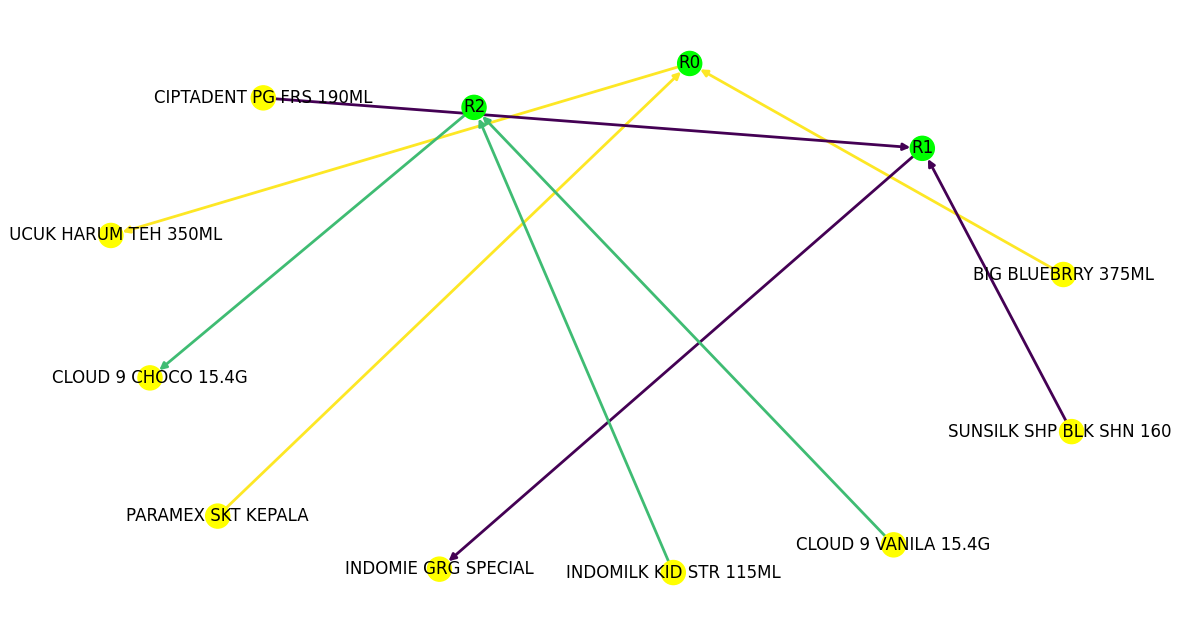

In [39]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50  # Membatasi jumlah warna acak
    colors = np.random.rand(N)  # Array warna acak
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    
    for i in range(rules_to_show):
        # Menambahkan node untuk setiap rule
        rule_node = "R" + str(i)
        G1.add_node(rule_node)
        
        # Menambahkan edges untuk antecedents (premis) -> rule
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)  # Menambahkan node antecedent
            G1.add_edge(a, rule_node, color=colors[i], weight=2)  # Menghubungkan antecedent ke rule

        # Menambahkan edges untuk rule -> consequents (konsekuen)
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)  # Menambahkan node consequent
            G1.add_edge(rule_node, c, color=colors[i], weight=2)  # Menghubungkan rule ke consequent
    
    # Menentukan warna node
    for node in G1:
        if node in strs:  # Jika node adalah rule node (misalnya R0, R1, ...)
            color_map.append('lime')
        else:  # Jika node adalah antecedent atau consequent
            color_map.append('yellow')
    
    # Menentukan warna dan bobot edge
    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]
    
    # Menata posisi node menggunakan spring_layout
    pos = nx.spring_layout(G1, k=16, seed=42)
    
    plt.figure(figsize=(15,8))
    plt.gca().set_facecolor("#F0F2F6") 

    # Menggambar graph
    nx.draw(
        G1, pos, node_color=color_map, edge_color=edge_colors, 
        width=edge_weights, font_size=16, with_labels=False
    )
    
    # Menambahkan label node (rule, antecedent, consequent)
    for p in pos:
        pos[p][1] += 0  # Mengangkat posisi label agar tidak menutupi node
    nx.draw_networkx_labels(G1, pos)
    
    # Menampilkan graph
    plt.show()

# Menjalankan fungsi dengan 10 aturan pertama
draw_graph(rules, 3)

In [40]:
# rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
# rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# # Replace frozen sets with strings
# rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
# rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# # Transform the DataFrame of rules into a matrix using the lift metric
# pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
#                     columns = 'consequents_', values= 'lift')


# # Replace frozen sets with strings
# rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
# rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# # Transform the DataFrame of rules into a matrix using the lift metric
# pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
#                     columns = 'consequents_', values= 'lift')

# # Generate a heatmap with annotations on and the colorbar off
# sns.heatmap(pivot, annot = True)
# plt.yticks(rotation=0)
# plt.xticks(rotation=90)
# plt.show()